In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
data = pd.read_csv(r"C:\Users\kevin\OneDrive\Documents\ANNA DSA Course\DATA SETS\car_age_price.csv")

In [304]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [305]:
data.shape

(112, 2)

In [306]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [307]:
data.isna().sum()

Year     0
Price    0
dtype: int64

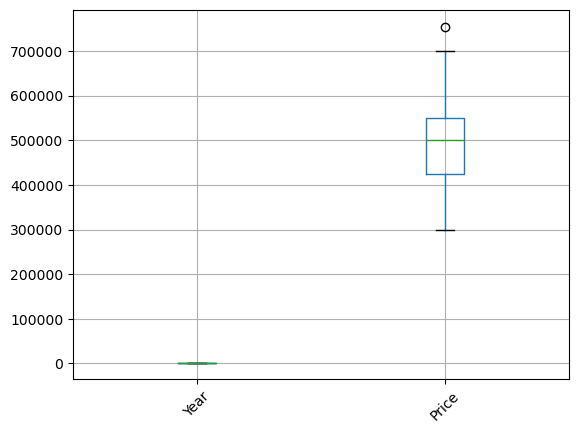

In [308]:
data.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [309]:
def remove_outliers(data, column):
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(upper = upper_bound)
    data[column] = data[column].clip(lower = lower_bound)
        
    return data[column]

In [310]:
for col in data:
    data[col] = remove_outliers(data, col)

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
x = data[['Year']]
y = data['Price']

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [314]:
#Doing Linearc Regression
from sklearn.linear_model import LinearRegression

In [315]:
lr = LinearRegression()
lr_model = lr.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [316]:
y_pred_lr

array([600170.13478352, 505305.89519151, 552738.01498751, 552738.01498751,
       552738.01498751, 410441.6555995 , 505305.89519151, 552738.01498751,
       600170.13478352, 600170.13478352, 315577.4160075 , 505305.89519151,
       410441.6555995 , 647602.25457953, 552738.01498751, 600170.13478352,
       315577.4160075 , 410441.6555995 , 505305.89519151, 505305.89519151,
       505305.89519151, 505305.89519151, 505305.89519151])

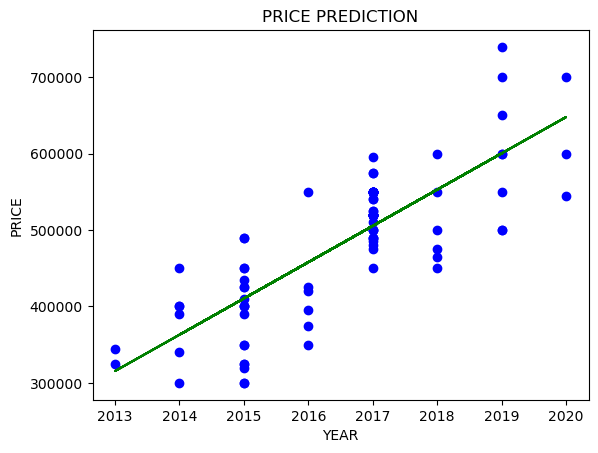

In [317]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lr_model.predict(x_train), color = 'green')
plt.title('PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [334]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred_lr))
print('R = Squared Value: ', r2_score(y_test, y_pred_lr))

Mean_Squared_Error: 4296980485.322585
R = Squared Value:  0.3719669899056065


In [319]:
#trying lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  
lasso_model = lasso.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_test)


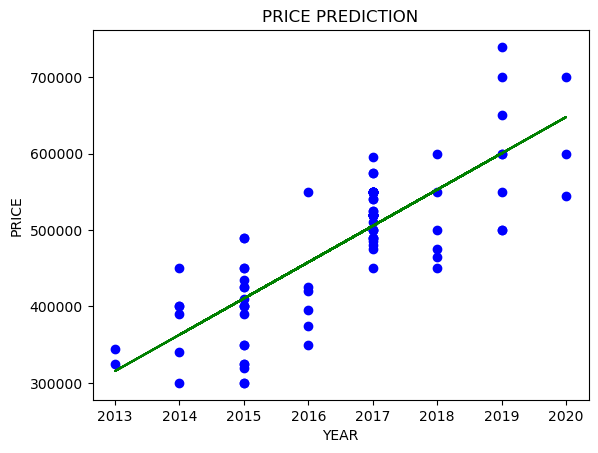

In [320]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, lasso_model.predict(x_train), color = 'green')
plt.title('PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [333]:
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred_lasso))
print('R = Squared Value: ', r2_score(y_test, y_pred_lasso))

Mean_Squared_Error: 4296975894.993163
R = Squared Value:  0.3719676608135648


In [322]:
#doing scaling to know 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

In [323]:
#trying polynomial regression for knowing 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)

In [324]:
x_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

In [325]:
lr = LinearRegression()
poly_model = lr.fit(x_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)

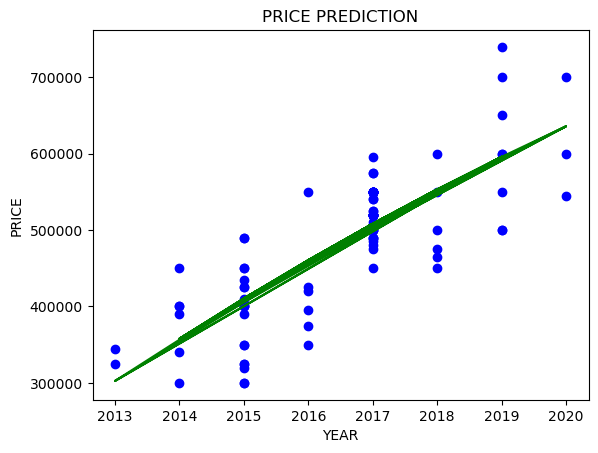

In [326]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, poly_model.predict(x_poly), color = 'green')
plt.title('PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [335]:
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred_poly))
print('R = Squared Value: ', r2_score(y_test, y_pred_poly))

Mean_Squared_Error: 4225726611.1011777
R = Squared Value:  0.38238122968654376


In [328]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge_model = ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(x_test_scaled)

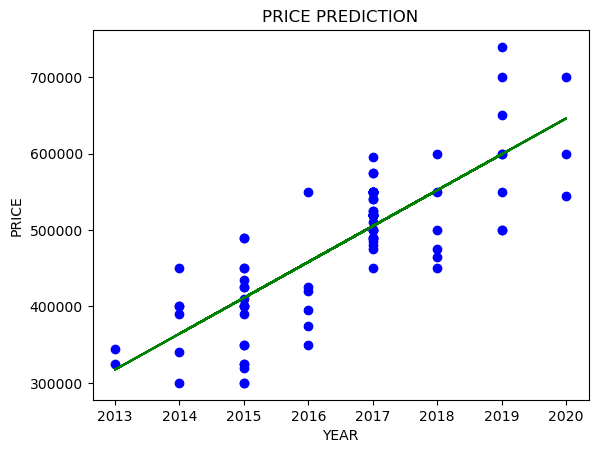

In [329]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, ridge_model.predict(x_train_scaled), color = 'green')
plt.title('PRICE PREDICTION')
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.show()

In [330]:
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred_ridge))
print('R = Squared Value: ', r2_score(y_test, y_pred_ridge))

Mean_Squared_Error: 4239259532.4452696
R = Squared Value:  0.3804033009162988


In [331]:
# predicting price of 2022 model
Year_2022 = np.array([[2022]])

price_linear_2022 = lr_model.predict(Year_2022)
price_lasso_2022 = lasso_model.predict(Year_2022)

year_2022_scaled_poly = poly_features.transform(year_2022)
price_poly_2022 = poly_model.predict(year_2022_scaled_poly)

year_2022_scaled = std_scaler.transform(year_2022)
price_ridge_2022 = ridge_model.predict(year_2022_scaled)


C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [332]:
print("Price_Linear_2022:", price_linear_2022)
print("Price_Lasso_2022:", price_lasso_2022)
print("Price_Poly_2022:", price_poly_2022)
print("Price_Ridge_2022:",price_ridge_2022 )     

Price_Linear_2022: [742466.49417153]
Price_Lasso_2022: [742466.27000417]
Price_Poly_2022: [707818.69803905]
Price_Ridge_2022: [739600.43349971]


In [336]:
print('R = Squared Value: ', r2_score(y_test, y_pred_lr))
print('R = Squared Value: ', r2_score(y_test, y_pred_lasso))
print('R = Squared Value: ', r2_score(y_test, y_pred_poly))# comparitavely good one
print('R = Squared Value: ', r2_score(y_test, y_pred_ridge))

R = Squared Value:  0.3719669899056065
R = Squared Value:  0.3719676608135648
R = Squared Value:  0.38238122968654376
R = Squared Value:  0.3804033009162988
